# $\LARGE Review \ of \ Materials $
# $\LARGE by \ the \ End \ of \ the \ Semester!$
$\tiny AKA \ Final$

Let's start by importing the important packages!

In [144]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier       
from sklearn.ensemble import RandomForestClassifier   
from sklearn import tree   
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier  
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
#RUN THIS
# Leave as it is
from sklearn.datasets import make_classification
data = make_classification(n_samples=1000, 
                           n_features=10, 
                           n_classes=3, 
                           n_informative=10,
                           n_redundant=0,
                           random_state=101                          
                          )
cols= 'length, mass, time, current, temperature, luminosity, power, force, voltage, angle'.split(', ')
df = pd.DataFrame(data[0], columns=cols)
df['class'] = data[1]
df

,length,mass,time,current,temperature,luminosity,power,force,voltage,angle,class
0,-4.068196,3.481396,-4.039867,-3.349011,2.886753,2.747877,1.040528,2.655199,-0.884899,-0.374143,1
1,-0.282678,1.966764,-5.201373,1.476197,0.097032,1.015267,-2.742044,-0.023600,0.451123,-0.280979,2
2,-3.581372,2.782032,-2.187123,-1.140330,-0.061283,-0.578173,-1.933654,2.739887,-0.510113,0.500177,1
3,-1.563583,1.246446,0.105664,-2.644443,-0.116675,-4.608155,-1.375857,0.333301,1.315895,-0.974759,2
4,-4.803900,-0.883822,-0.210634,-2.737530,-0.723049,1.326654,1.356087,-2.544946,1.361207,-0.175419,2
...,...,...,...,...,...,...,...,...,...,...,...
995,0.551086,-1.126487,1.231791,0.275324,1.708948,0.129677,3.585624,0.957826,-2.396420,1.851528,0
996,-1.825596,4.654699,1.041295,-0.096305,5.782331,5.263275,4.640146,1.167421,5.047198,2.097575,0
997,-0.927152,2.439089,2.977772,-0.882478,-1.178721,-1.174908,0.910216,2.598111,-0.871019,0.884540,0
998,-1.417208,1.938080,0.687500,-2.798176,0.218325,2.342233,2.484426,0.784349,3.256662,2.307512,0


# IMPORTANT NOTE: In some of the tasks below you may require scaling, however, not necessarilly in all of them. So, apply if required!

# Part I
### Create the following plots

<AxesSubplot:xlabel='current', ylabel='Count'>

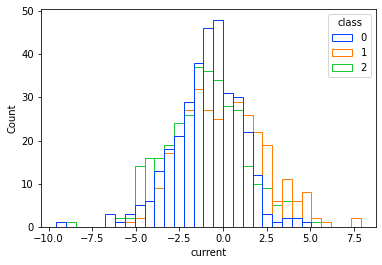

In [120]:

sns.histplot(data=df, x='current', hue = 'class', palette = 'bright', fill=False )

<AxesSubplot:xlabel='current', ylabel='Count'>

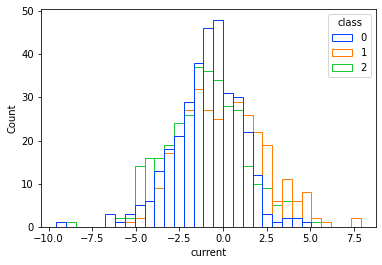

In [94]:
#YOUR CODE IN THE CELL ABOVE
# DO NOT RUN THIS

<AxesSubplot:>

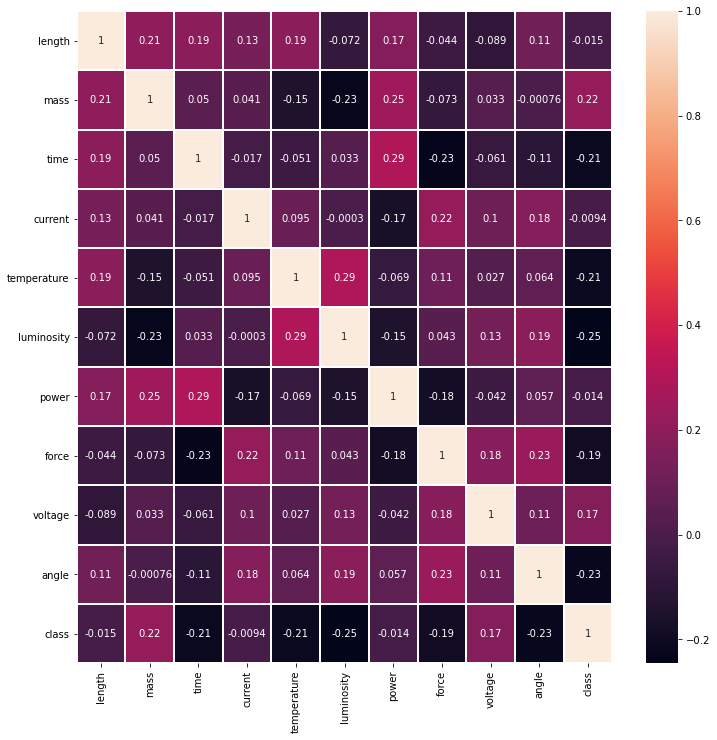

In [126]:
df_corr = df.corr()
plt.figure(figsize = (12,12))
sns.heatmap(df_corr, annot=True, linewidth = 1)

<AxesSubplot:>

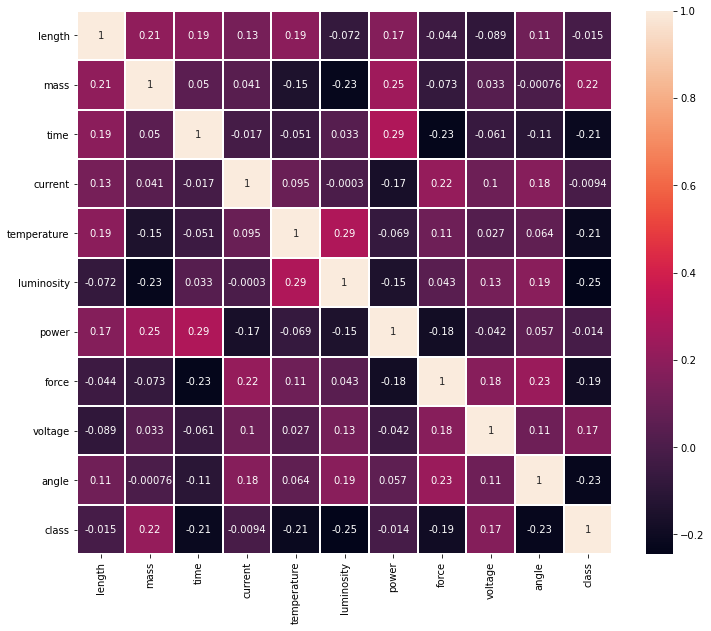

In [99]:
#YOUR CODE IN THE CELL ABOVE
# DO NOT RUN THIS

Any correlation among columns?

There does not seem to be much correlation. The maximum correlation looks like 0.29 with Power & Time, and with Luminosity & Temperature 

# Part II
### Use logistic regression to predict the class

- Define X & y
- train test split
- fit your model!
- print out the coefficients of your model for each of the classes as a **data frame!** Note: This Data Frame should have intercept included!
- make the prediction and print out the confusion matrix and the classification report.

In [64]:
X = df.drop(['class'], axis=1)
y = df['class']#[df['class']>0]  #might need to make it only for 2 different classes

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)
lg=LogisticRegression(max_iter=10000)
lg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [132]:
lg.coef_

array([[-0.15230883, -0.21736657,  0.49623309, -0.16093361,  0.08848556,
         0.05944817,  0.21383867,  0.04089006, -0.24660555,  0.318163  ],
       [ 0.17224906,  0.08538382, -0.3152594 ,  0.15983992,  0.08659727,
         0.13340784, -0.36186005,  0.32011068,  0.05588236, -0.30111959],
       [-0.01994023,  0.13198275, -0.18097369,  0.00109369, -0.17508283,
        -0.192856  ,  0.14802137, -0.36100074,  0.19072319, -0.01704341]])

In [140]:
lg_coef = pd.DataFrame(data=lg.coef_.T.reshape(10,3), 
                       index = X.columns, 
                       columns = ['Coefficient1', 'Coefficient2','Coefficient3'])

In [147]:
lg_coef.loc['Intercept'] = lg.intercept_
lg_coef

,Coefficient1,Coefficient2,Coefficient3
length,-0.152309,0.172249,-0.019940
mass,-0.217367,0.085384,0.131983
time,0.496233,-0.315259,-0.180974
current,-0.160934,0.159840,0.001094
temperature,0.088486,0.086597,-0.175083
luminosity,0.059448,0.133408,-0.192856
power,0.213839,-0.361860,0.148021
force,0.040890,0.320111,-0.361001
voltage,-0.246606,0.055882,0.190723
angle,0.318163,-0.301120,-0.017043


In [59]:
lg_pred_y = lg.predict(X_test)
print(confusion_matrix(y_test, lg_pred_y))
print(classification_report(y_test, lg_pred_y))

[[99 15]
 [26 80]]
              precision    recall  f1-score   support

           1       0.79      0.87      0.83       114
           2       0.84      0.75      0.80       106

    accuracy                           0.81       220
   macro avg       0.82      0.81      0.81       220
weighted avg       0.82      0.81      0.81       220



# Part III - Random Forest
### Improve your results via random forest
- Perform random forest
- Print out the confusion matrix and classification report

In [61]:
rf = RandomForestClassifier(n_estimators=5)
rf.fit(X_train,y_train)
rf_pred_y=rf.predict(X_test)
print(confusion_matrix(y_test, rf_pred_y))
print(classification_report(y_test, rf_pred_y))

[[93 21]
 [17 89]]
              precision    recall  f1-score   support

           1       0.85      0.82      0.83       114
           2       0.81      0.84      0.82       106

    accuracy                           0.83       220
   macro avg       0.83      0.83      0.83       220
weighted avg       0.83      0.83      0.83       220



Print 2 of your decission trees in the random forest.
Note: Your solution must use subplots and a for loop

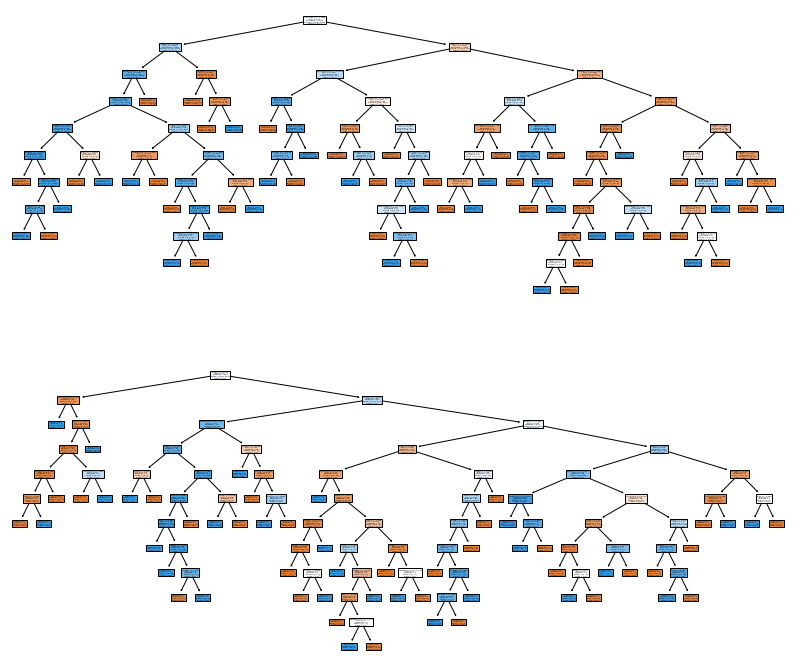

In [183]:
fig, ax = plt.subplots(nrows=2, figsize=[14,12])
i = 0
for n in rf.estimators_[:2]:
    tree.plot_tree(n, feature_names = X.columns, 
                   class_names = True, filled = True, ax=ax[i])
    i+=1

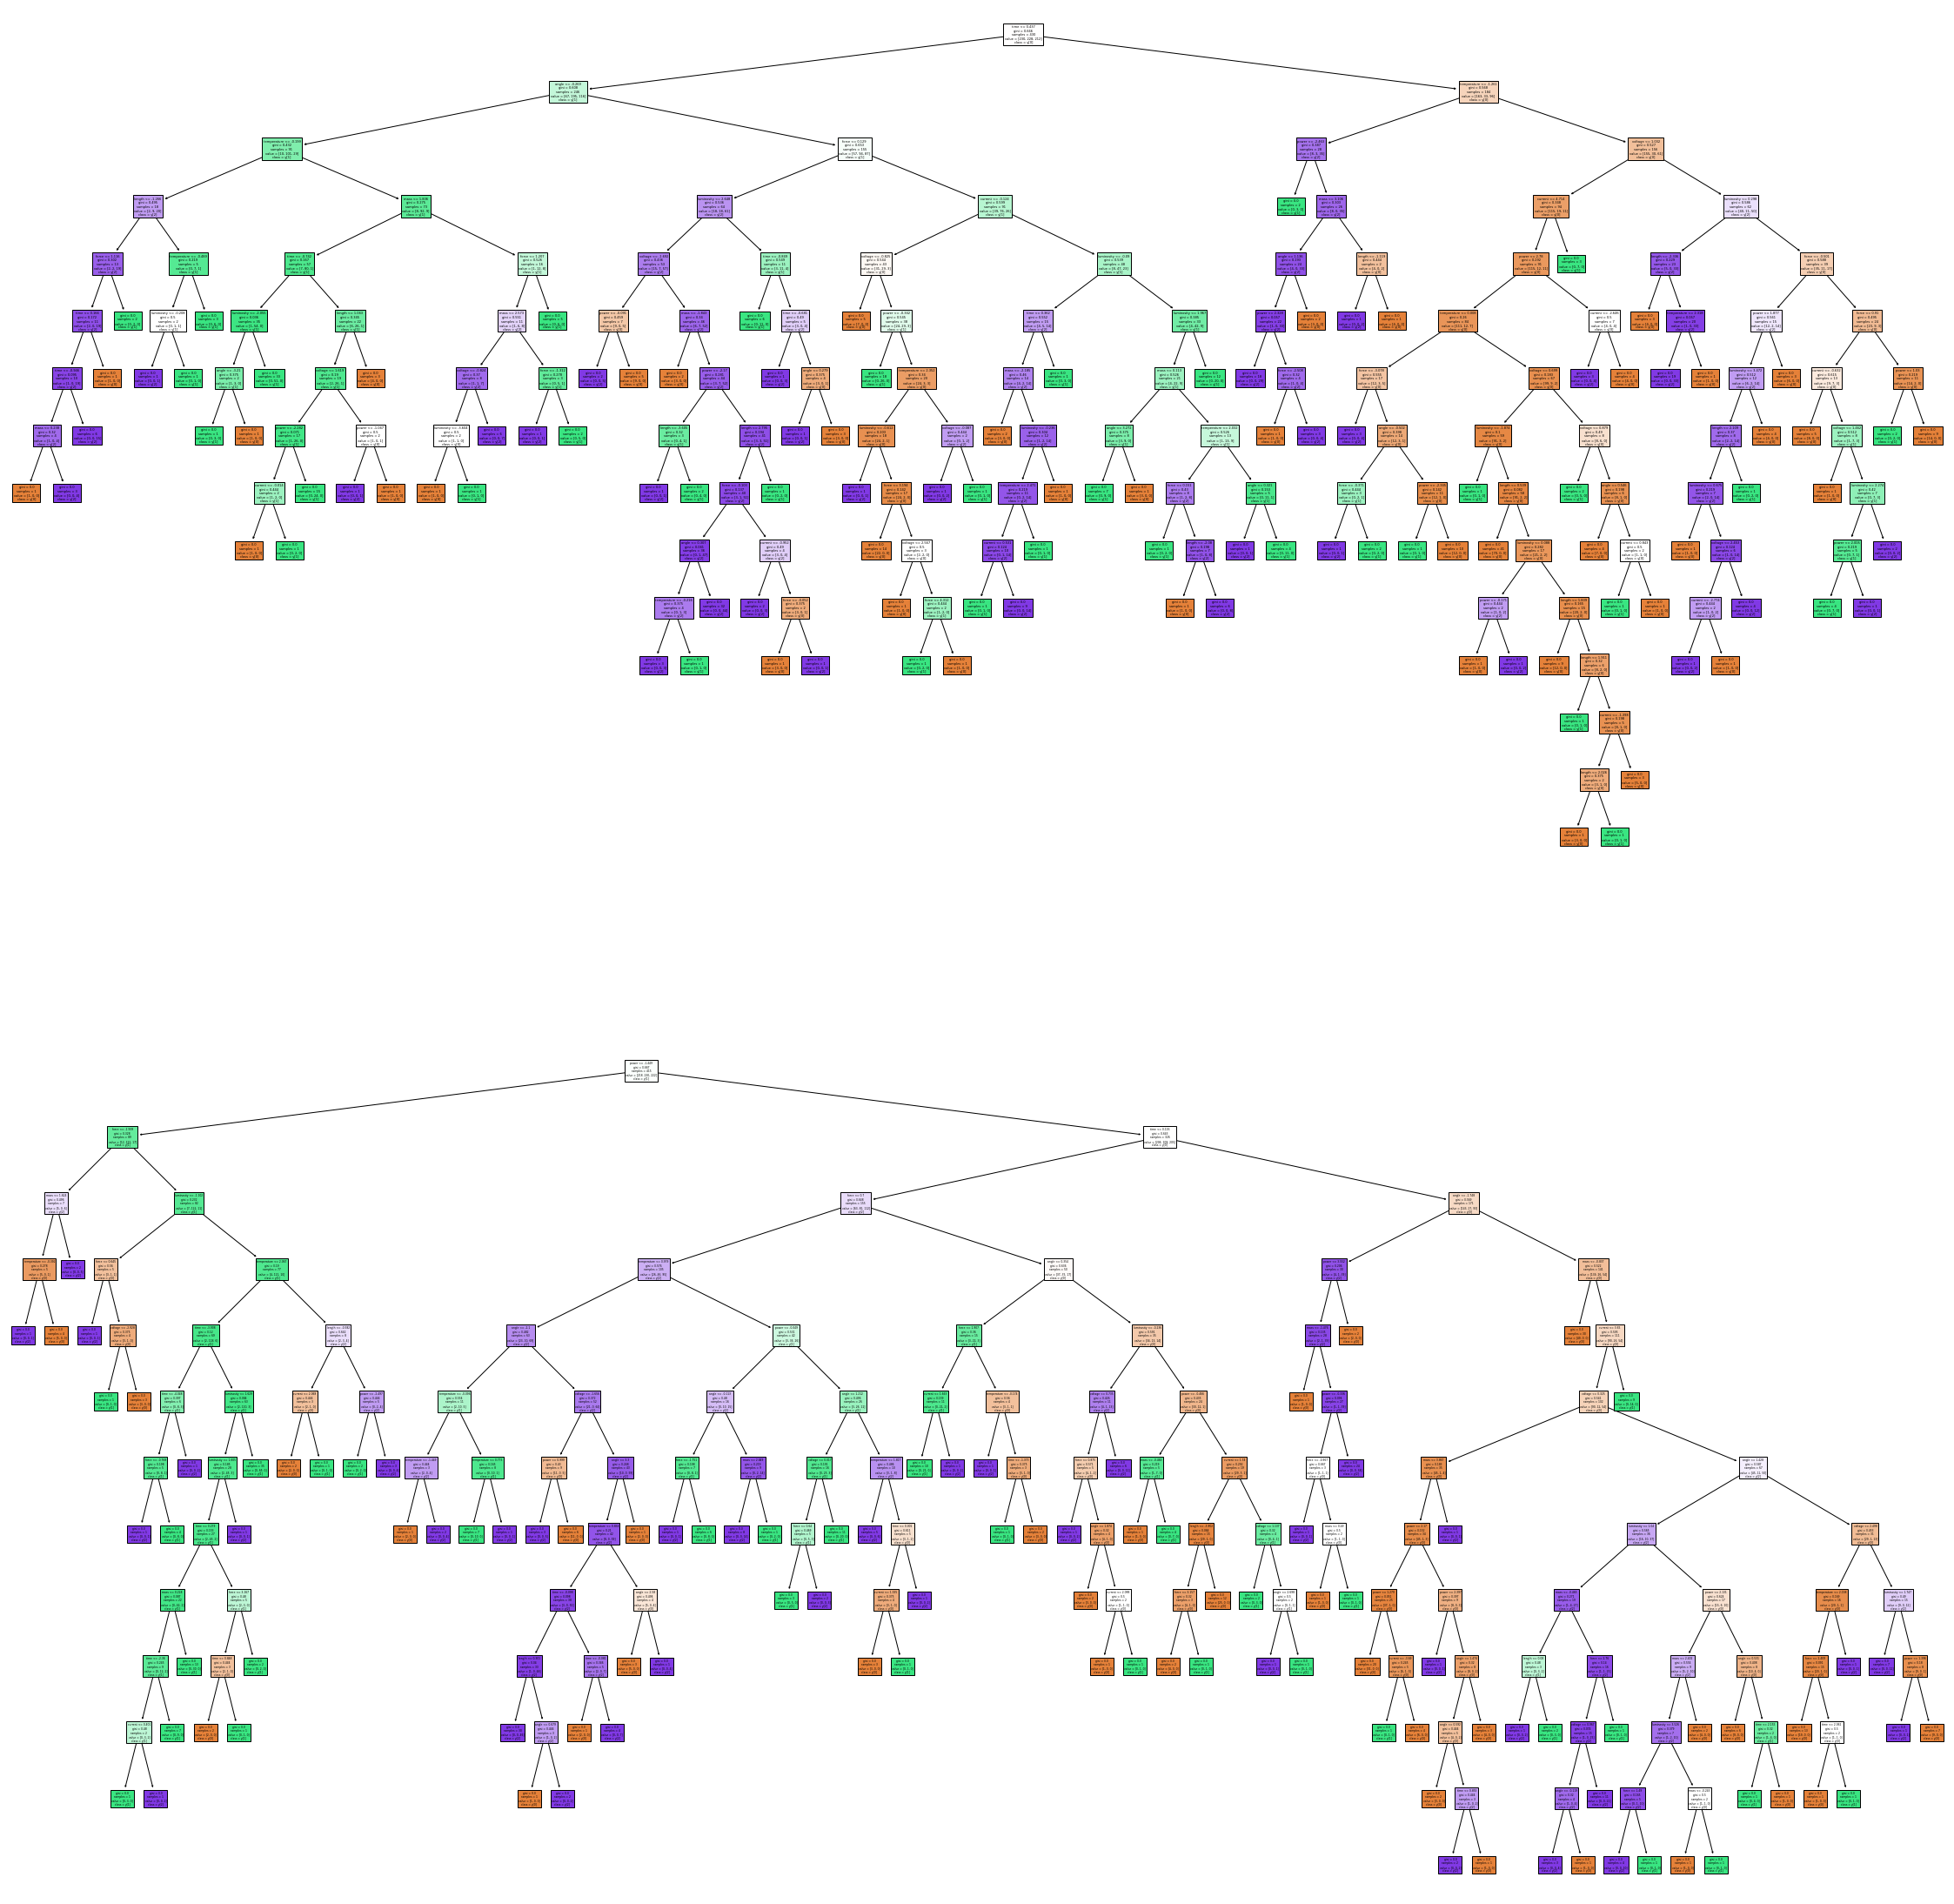

# Part IV - KNN
Now use KNN and see if it can improve the result
- You need to find the best K value for the K in range(1,40)

In [87]:
scal = StandardScaler()
scld_X_train = scal.fit_transform(X_train)
scld_X_test = scal.transform(X_test)

In [88]:
error_1 = []
k = range(1,40)
for i in k:
    KNN1 = KNeighborsClassifier(n_neighbors = i)
    KNN1.fit(scld_X_train, y_train)
    n = 0
    for n1, n2, in zip(y_test,KNN1.predict(scld_X_test)):
        if n1 != n2:
            n+=1
    error_1.append(n/len(y_test))

In [92]:
np.argmin(error_1)  # the location of the minimum error in the list

19

In [94]:
# 19 in the list means that since k started at 1 then the k is at 20 for minimum error
KNN = KNeighborsClassifier(n_neighbors = 20)
KNN.fit(scld_X_train, y_train)
KNN_pred_y = KNN.predict(scld_X_test)
print(confusion_matrix(y_test, KNN_pred_y))
print(classification_report(y_test, KNN_pred_y))

[[97  5 11]
 [ 4 89 13]
 [ 6  9 96]]
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       113
           1       0.86      0.84      0.85       106
           2       0.80      0.86      0.83       111

    accuracy                           0.85       330
   macro avg       0.86      0.85      0.85       330
weighted avg       0.86      0.85      0.86       330



# Part V - ANN
- Now we are going to perform ANN classification
- However, since there are three classes we need to convert our classes from [0,1,2] to [[1,0,0], [0,1,0], [0,0,1]]

**This is known as converting integer encoding to one-hot encoding** we can do this with the following line of code. Run it and see it for yourself.
### IMPORTANT NOTE: I am assuming you called y as small letter 'y' above! You may need to rename it appropriately based on your lines of coding above!

In [95]:
#RUN THIS LINE
#Leave as it is

from tensorflow.keras.utils import to_categorical
y_cat = to_categorical(y)

pd.DataFrame(([y_cat[i], y[i]] for i in range(len(y_cat))))

,0,1
0,"[0.0, 1.0, 0.0]",1
1,"[0.0, 0.0, 1.0]",2
2,"[0.0, 1.0, 0.0]",1
3,"[0.0, 0.0, 1.0]",2
4,"[0.0, 0.0, 1.0]",2
...,...,...
995,"[1.0, 0.0, 0.0]",0
996,"[1.0, 0.0, 0.0]",0
997,"[1.0, 0.0, 0.0]",0
998,"[1.0, 0.0, 0.0]",0


Now use y_cat and X to perform ANN.
- You should split into test, train, & validation
- You should create a model of 3 hidden layers! Number of nodes is up to you
- Your model should use, dropout
- You need to appropriately define number of the output nodes based on the number of classes! Use sigmoid as activation for the last output layer!
- You need to use appropriate loss function for multi classification

In [97]:
X1_train, X1_new, y1_train, y1_new = train_test_split(X,y_cat, test_size=0.30, random_state=42)
X1_validation, X1_test, y1_validation, y1_test = train_test_split(X1_new,y1_new, test_size=0.50, random_state=42)

In [98]:
scal1 = StandardScaler()
scld_X1_train = scal1.fit_transform(X1_train)
scld_X1_validation = scal1.transform(X1_validation)
scld_X1_test = scal1.transform(X1_test)

In [187]:
ANN = Sequential()
ANN.add(Dense(30, activation='relu'))
ANN.add(Dropout(0.5))
ANN.add(Dense(10, activation='relu'))
ANN.add(Dropout(0.5))
ANN.add(Dense(10, activation='relu'))
ANN.add(Dropout(0.5))
ANN.add(Dense(10, activation='relu'))
ANN.add(Dropout(0.5))
ANN.add(Dense(3, activation='sigmoid'))
ANN.compile(optimizer='adam', loss='categorical_crossentropy')


Define Earlystopping and fit your model

In [169]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [188]:
ANN.fit(x=scld_X1_train, y=y1_train, 
          epochs = 600, 
          verbose=1, 
          batch_size = 31,
          callbacks= [early_stop], 
          validation_data=(scld_X1_validation, y1_validation))

Epoch 1/600
23/23 [==============================] - 2s 13ms/step - loss: 1.2479 - val_loss: 1.1100
Epoch 2/600
23/23 [==============================] - 0s 5ms/step - loss: 1.2245 - val_loss: 1.1018
Epoch 3/600
23/23 [==============================] - 0s 5ms/step - loss: 1.1573 - val_loss: 1.0983
Epoch 4/600
23/23 [==============================] - 0s 5ms/step - loss: 1.1585 - val_loss: 1.0962
Epoch 5/600
23/23 [==============================] - 0s 5ms/step - loss: 1.1405 - val_loss: 1.0951
Epoch 6/600
23/23 [==============================] - 0s 5ms/step - loss: 1.1351 - val_loss: 1.0945
Epoch 7/600
23/23 [==============================] - 0s 5ms/step - loss: 1.1310 - val_loss: 1.0953
Epoch 8/600
23/23 [==============================] - 0s 5ms/step - loss: 1.1218 - val_loss: 1.0951
Epoch 9/600
23/23 [==============================] - 0s 5ms/step - loss: 1.1344 - val_loss: 1.0949
Epoch 10/600
23/23 [==============================] - 0s 5ms/step - loss: 1.0940 - val_loss: 1.0949
Epoch 11

Epoch 83/600
23/23 [==============================] - 0s 5ms/step - loss: 1.0048 - val_loss: 0.8668
Epoch 84/600
23/23 [==============================] - 0s 5ms/step - loss: 0.9874 - val_loss: 0.8730
Epoch 85/600
23/23 [==============================] - 0s 5ms/step - loss: 0.9691 - val_loss: 0.8689
Epoch 86/600
23/23 [==============================] - 0s 6ms/step - loss: 0.9937 - val_loss: 0.8661
Epoch 87/600
23/23 [==============================] - 0s 5ms/step - loss: 0.9769 - val_loss: 0.8728
Epoch 88/600
23/23 [==============================] - 0s 5ms/step - loss: 0.9639 - val_loss: 0.8647
Epoch 89/600
23/23 [==============================] - 0s 5ms/step - loss: 0.9796 - val_loss: 0.8640
Epoch 90/600
23/23 [==============================] - 0s 5ms/step - loss: 0.9930 - val_loss: 0.8606
Epoch 91/600
23/23 [==============================] - 0s 5ms/step - loss: 0.9402 - val_loss: 0.8466
Epoch 92/600
23/23 [==============================] - 0s 5ms/step - loss: 0.9452 - val_loss: 0.8338


23/23 [==============================] - 0s 5ms/step - loss: 0.7556 - val_loss: 0.5746
Epoch 165/600
23/23 [==============================] - 0s 5ms/step - loss: 0.8057 - val_loss: 0.5674
Epoch 166/600
23/23 [==============================] - 0s 5ms/step - loss: 0.8476 - val_loss: 0.5724
Epoch 167/600
23/23 [==============================] - 0s 5ms/step - loss: 0.8261 - val_loss: 0.5768
Epoch 168/600
23/23 [==============================] - 0s 5ms/step - loss: 0.7745 - val_loss: 0.5807
Epoch 169/600
23/23 [==============================] - 0s 5ms/step - loss: 0.8169 - val_loss: 0.5790
Epoch 170/600
23/23 [==============================] - 0s 5ms/step - loss: 0.7803 - val_loss: 0.5754
Epoch 171/600
23/23 [==============================] - 0s 5ms/step - loss: 0.7938 - val_loss: 0.5649
Epoch 172/600
23/23 [==============================] - 0s 5ms/step - loss: 0.8249 - val_loss: 0.5670
Epoch 173/600
23/23 [==============================] - 0s 5ms/step - loss: 0.7993 - val_loss: 0.5737
Epoc

Plot loss function and validation loss

<AxesSubplot:>

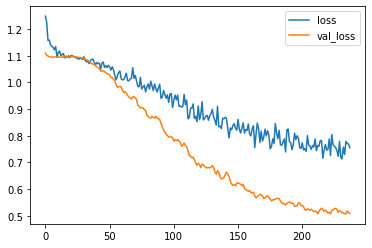

In [189]:
loss_df1 = pd.DataFrame(ANN.history.history)
loss_df1.plot()

<AxesSubplot:>

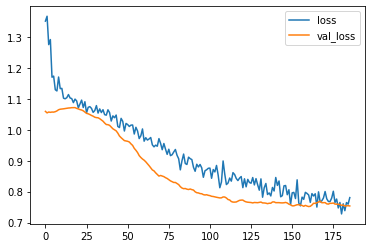

In [231]:
#YOUR CODE IN THE CELL ABOVE
# DO NOT RUN THIS



Perform prediction and print it out

In [190]:
ANN_pred_y = ANN.predict(scld_X1_test)
ANN_pred_y

5/5 [==============================] - 0s 2ms/step


array([[4.4560462e-01, 4.2132273e-01, 6.7967713e-01],
       [5.2063292e-01, 3.9048979e-01, 5.4551703e-01],
       [4.2441314e-01, 4.3590954e-01, 6.9432563e-01],
       [3.8363573e-01, 4.7580567e-01, 7.1635234e-01],
       [4.2849496e-01, 4.3224025e-01, 6.9221121e-01],
       [4.4817421e-01, 4.1966793e-01, 6.7665005e-01],
       [5.4494393e-01, 3.8502896e-01, 4.7246432e-01],
       [2.1466763e-01, 6.6704494e-01, 8.0824268e-01],
       [7.7158135e-01, 4.8583969e-01, 1.0651561e-02],
       [7.8296268e-01, 4.9777988e-01, 8.7421844e-03],
       [5.9332401e-01, 9.9989259e-01, 1.1724494e-03],
       [7.5575811e-01, 4.7846204e-01, 1.5902616e-02],
       [4.2731923e-01, 4.6820697e-01, 6.7318547e-01],
       [5.1021057e-01, 9.5354253e-01, 1.1183390e-01],
       [9.7178358e-01, 7.1678221e-01, 4.3336306e-07],
       [4.4957027e-01, 4.1816214e-01, 6.7472178e-01],
       [7.7644473e-01, 9.9810886e-01, 1.6971827e-03],
       [4.1182539e-01, 4.4766381e-01, 7.0123059e-01],
       [5.4032612e-01, 3.875

In [232]:
#YOUR CODE IN THE CELL ABOVE
# DO NOT RUN THIS

array([[7.66884565e-01, 1.07049853e-01, 7.16257691e-01],
       [9.34199691e-01, 9.37977433e-03, 9.06905055e-01],
       [8.48372638e-01, 3.98856997e-02, 8.11113238e-01],
       [2.17936367e-01, 9.41496432e-01, 6.52528584e-01],
       [9.93996143e-01, 5.70646334e-05, 9.92017806e-01],
       [6.76839292e-01, 1.82412565e-01, 6.95169270e-01],
       [6.38740122e-01, 2.40953058e-01, 7.44841754e-01],
       [8.17604125e-01, 5.98531663e-02, 7.75302649e-01],
       [9.99596238e-01, 5.88357771e-08, 9.99575734e-01],
       [9.98172879e-01, 3.03141114e-05, 9.96218324e-01],
       [9.95906353e-01, 1.00453581e-05, 9.95179176e-01],
       [9.89852071e-01, 1.09952380e-04, 9.87912774e-01],
       [4.65792954e-01, 6.05161548e-01, 5.79869449e-01],
       [9.97416675e-01, 2.98417285e-06, 9.97846723e-01],
       [9.90299821e-01, 1.75714493e-04, 9.86001790e-01],
       [3.59053135e-01, 7.98716068e-01, 5.28456211e-01],
       [9.88670409e-01, 7.84272124e-05, 9.90072608e-01],
       [2.46399254e-01, 9.20112

Review your knowledge from np.argmax() you may google it or go to my slides.

For every data entery you get three values. These values are "sort of"$\ddagger$ representing the probability of each of the classes to be true (i.e. class 0, 1, & 2). The highest value is going to be your prediction. Use argmax to find out where this is located! Hint: Consider using 'axis= ' within np.argmax() 
- The outcome of argmax is going to match your classes! You later need to compare it to y to provide classification report.

$\ddagger$ Note: summing up the prediced values for each entery would not result to 1. This is why a softmax function is more commonly used. Review your knowledge of Partition Function, after the exam though! ^_^

In [191]:
ANN_class_pred = np.argmax(ANN_pred_y, axis=1)
ANN_class_pred

array([2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 1, 0, 2, 1, 0, 2, 1, 2, 0, 1, 0, 1,
       2, 1, 2, 1, 0, 0, 2, 2, 2, 2, 2, 0, 1, 2, 0, 2, 1, 2, 1, 2, 0, 2,
       0, 0, 1, 2, 1, 2, 2, 0, 2, 1, 2, 0, 0, 0, 2, 0, 2, 1, 0, 1, 0, 0,
       1, 2, 2, 0, 1, 1, 0, 0, 1, 1, 0, 1, 2, 2, 2, 2, 0, 2, 0, 2, 0, 1,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 1, 1, 0, 1, 2,
       1, 2, 0, 1, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 1, 2, 0, 0, 2, 1, 2, 2,
       2, 1, 0, 1, 2, 0, 2, 2, 0, 0, 1, 2, 2, 0, 2, 1, 2, 1])

In [233]:
#YOUR CODE IN THE CELL ABOVE
# DO NOT RUN THIS


array([0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 1, 2, 0, 1, 2, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 0, 1, 2, 1, 2, 0, 1, 0, 2, 1,
       2, 0, 0, 0, 2, 1, 1, 0, 1, 0, 1, 0, 1, 2, 0, 2, 2, 0, 2, 0, 0, 2,
       1, 0, 2, 0, 1, 1, 0, 1, 0, 0, 2, 0, 0, 1, 0, 2, 0, 1, 2, 2, 2, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 2, 2, 0, 2, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 2, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1], dtype=int64)

Apply your argmax on the y_cat_test and then create the confusion matrix and classification report as usual. 

In [174]:
y_test = np.argmax(y1_test, axis=1)
y_test

array([2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 1, 0, 2, 1, 0, 2, 1, 2, 0, 1, 0, 2,
       2, 1, 2, 1, 1, 0, 1, 2, 2, 2, 2, 0, 1, 1, 1, 2, 2, 2, 1, 2, 0, 2,
       0, 1, 1, 2, 1, 0, 2, 1, 2, 1, 2, 1, 0, 0, 2, 0, 2, 1, 0, 1, 0, 0,
       1, 2, 2, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 2, 2, 1, 0, 2, 0, 2, 0, 1,
       0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 1, 1, 0, 1, 2,
       1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 1, 1, 0, 2, 1, 1, 2, 2,
       2, 1, 0, 0, 0, 0, 2, 1, 0, 0, 1, 2, 2, 2, 2, 1, 2, 1])

In [192]:
print(confusion_matrix(y_test, ANN_class_pred))
print(classification_report(y_test, ANN_class_pred))

[[45  1  7]
 [ 6 31  7]
 [ 4  2 47]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.83        53
           1       0.91      0.70      0.79        44
           2       0.77      0.89      0.82        53

    accuracy                           0.82       150
   macro avg       0.83      0.81      0.82       150
weighted avg       0.83      0.82      0.82       150



# Well done! Congrats.